## Sutton & Bario : Chapter 1, Figure 1

In [1]:
import pandas as pd 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.transforms as trans
import seaborn as sns

from collections import defaultdict

In [2]:
n_trial = 10000

In [3]:
q_true = np.random.standard_normal(10)
q_true = q_true.tolist()
q_true = [round(i,2) for i in q_true]
q_true

[-0.32, 0.2, 1.53, 0.21, -0.38, -0.87, -0.68, -1.04, -1.55, 0.57]

In [4]:
sample_of_reward_per_bandit = defaultdict(list)
q_estimate = []
bandit = 0

for mean in q_true:
    sample_of_reward = np.random.normal(mean,1, n_trial)
    expected_reward  = sample_of_reward.mean()
    q_estimate.append( round(expected_reward,2) )
    
    sample_of_reward_per_bandit[ bandit ] = sample_of_reward
    bandit += 1
    

In [5]:
print( q_estimate )

[-0.32, 0.18, 1.51, 0.2, -0.39, -0.86, -0.68, -1.05, -1.55, 0.58]


In [6]:
#print( sample_of_reward_per_bandit )

In [7]:
n_bin = 101
hist, bin_edges = np.histogram( sample_of_reward_per_bandit[0], bins=n_bin, density=False )

(0.0, 330.0)

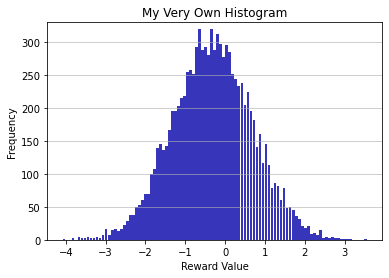

In [8]:
# Density= False
n, bins, patches = plt.hist(x=sample_of_reward_per_bandit[0], 
                            bins=n_bin, density=False, 
                            color='#0504aa', 
                            alpha=0.8, rwidth=0.9,
                            orientation='vertical')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Reward Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
#plt.text(23, 45, r'$\mu=15, b=3$')
# Set a clean upper y-axis limit
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

Text(0.5, 1.0, 'My Very Own Histogram')

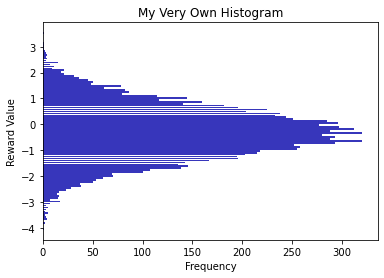

In [9]:
# Density= False
n, bins, patches = plt.hist(x=sample_of_reward_per_bandit[0], 
                            bins=n_bin, density=False, 
                            color='#0504aa', 
                            alpha=0.8, rwidth=0.9,
                            orientation='horizontal')
plt.xlabel('Frequency')
plt.ylabel('Reward Value')
plt.title('My Very Own Histogram')

Text(0.5, 1.0, 'My Very Own Histogram')

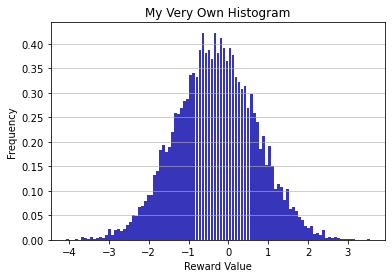

In [10]:
# Density= True
n, bins, patches = plt.hist(x=sample_of_reward_per_bandit[0], 
                            bins=n_bin, density=True, 
                            color='#0504aa', 
                            alpha=0.8, rwidth=0.9)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Reward Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')

Text(0, 0.5, 'Normalized Frequency')

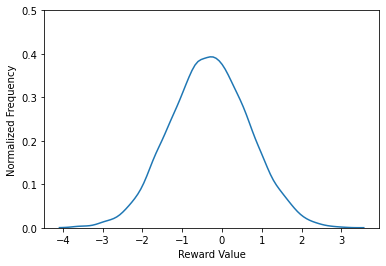

In [11]:
# Kernel Density
from scipy import stats, optimize, interpolate

y = sp.stats.kde.gaussian_kde( sample_of_reward_per_bandit[0] )
x = bin_edges
plt.plot(x, y(x))
plt.ylim(ymin=0, ymax=0.5)
plt.xlabel('Reward Value')
plt.ylabel('Normalized Frequency')

([], <a list of 0 Text major ticklabel objects>)

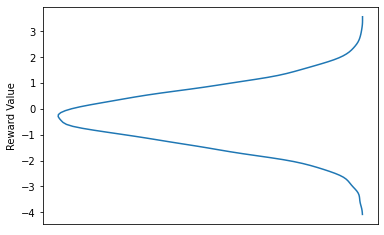

In [12]:
rot = trans.Affine2D().rotate_deg(90)
base = plt.gca().transData

y = sp.stats.kde.gaussian_kde( sample_of_reward_per_bandit[0] )
x = bin_edges
plt.plot(x, y(x), transform=rot+base)
plt.ylabel('Reward Value')
plt.xticks([])

Text(0.5, 1.0, 'My Very Own Histogram')

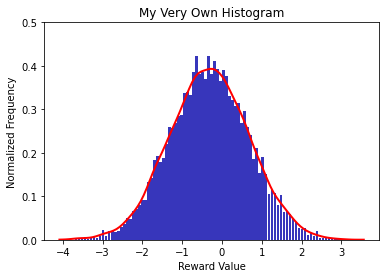

In [13]:
fig, ax = plt.subplots(nrows=1,ncols=1, sharey=True)

# Histogram 
n, bins, patches = ax.hist(x=sample_of_reward_per_bandit[0], 
                           bins=n_bin, density=True,
                           color='#0504aa', 
                           alpha=0.8, rwidth=0.9)
# Density
y = sp.stats.kde.gaussian_kde( sample_of_reward_per_bandit[0] )
x = bin_edges
ax.plot(x, y(x), color='red', linestyle='solid', linewidth=2)
# Set plot properties 
ax.set_ylim(ymin=0, ymax=0.5)
ax.set_xlabel('Reward Value')
ax.set_ylabel('Normalized Frequency')
ax.set_title('My Very Own Histogram')

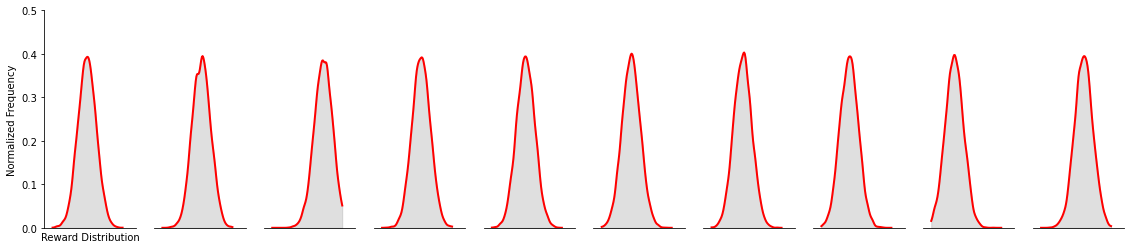

In [14]:
number_of_bandit = 10
fig, ax = plt.subplots(nrows=1, ncols=number_of_bandit, sharex=False, sharey=False)

for i in range(number_of_bandit):    
    y = sp.stats.kde.gaussian_kde( sample_of_reward_per_bandit[i] )
    x = bin_edges
    ax[i].plot(x, y(x), color='red', linestyle='solid', linewidth=2)
   
    ax[i].fill_between(x, y(x), color='grey', alpha=0.25)
    
    ax[i].set_xlim(xmin=-5, xmax=5)
    ax[i].set_ylim(ymin=0, ymax=0.5)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    
    ax[i].set_xticks([])
    ax[i].grid(False)
    #ax[i].set_facecolor('w')

    if i == 0:        
        ax[i].set_xlabel('Reward Distribution')
        ax[i].set_ylabel('Normalized Frequency')
        
    if i > 0:
        ax[i].yaxis.set_visible(False) 
        ax[i].spines['left'].set_visible(False)
    
    plt.subplots_adjust(left=0, right=2.5, wspace=0.2) 

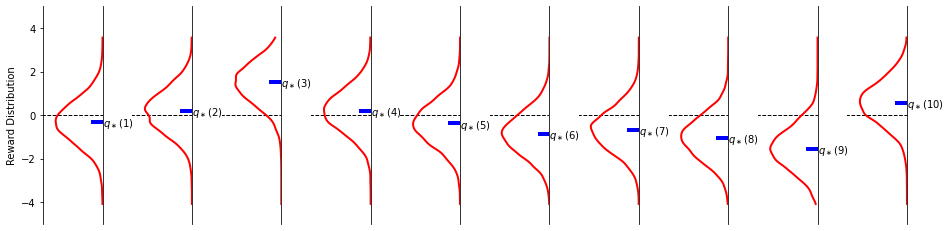

In [15]:
number_of_bandit = 10
fig, ax = plt.subplots(nrows=1, ncols=number_of_bandit, sharex=False, sharey=False)

for i in range(number_of_bandit):
    
    rot = trans.Affine2D().rotate_deg(90)
    base = ax[i].transData

    y = sp.stats.kde.gaussian_kde( sample_of_reward_per_bandit[i] )
    x = bin_edges
    ax[i].plot(x, y(x), color='red', linestyle='solid', linewidth=2, transform=rot+base)
    
    ax[i].hlines(y=0, xmin=-0.6, xmax=0, linestyle='dashed', color='black', linewidth=1)
    ax[i].hlines(q_true[i], xmin=-0.1, xmax=0.1, linestyle='solid', color='blue', linewidth=4)
    ax[i].text(0, q_true[i]-0.2, r'$q_\ast({0})$'.format(i+1), fontsize=10)
    
    ax[i].set_xticks([])
    ax[i].set_xlim(xmin=-0.5, xmax=0)
    ax[i].set_ylim(ymin=-5, ymax=+5)
    
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    
    if i == 0:
        ax[i].set_ylabel('Reward Distribution')

    if i > 0:
        ax[i].yaxis.set_visible(False) 
        ax[i].spines['left'].set_visible(False)
       
    plt.subplots_adjust(left=0, right=2.00, wspace=0.5)

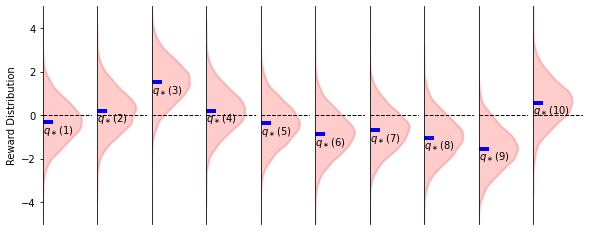

In [16]:
number_of_bandit = 10
fig, ax = plt.subplots(nrows=1, ncols=number_of_bandit, sharex=False, sharey=False)

for i in range(number_of_bandit):
    sns.kdeplot(data = sample_of_reward_per_bandit[i], kernel='gau', ax=ax[i], 
                vertical=True, shade=True, color='red', alpha=0.2, linewidth=2)
    
    ax[i].hlines(y=0, xmin=0, xmax=1.0, linestyle='dashed', color='black', linewidth=1)
    ax[i].hlines(q_true[i], xmin=-0.1, xmax=0.1, linestyle='solid', color='blue', linewidth=4)
    ax[i].text(0, q_true[i]-0.5, r'$q_\ast({0})$'.format(i+1), fontsize=10)
    
    ax[i].set_xlim(xmin=0, xmax=0.5)
    ax[i].set_ylim(ymin=-5, ymax=+5) 
    ax[i].set_xticks([])
    
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
        
    if i == 0:
        ax[i].set_ylabel('Reward Distribution')
           
    if i > 0:
        ax[i].set_yticks([])
        ax[i].spines['right'].set_visible(False)
        
plt.subplots_adjust(left=0, right=1.25, wspace=0.1)

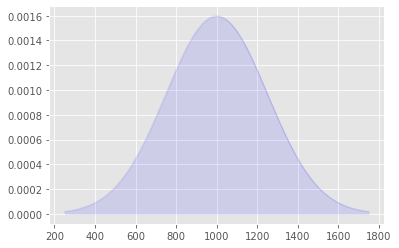

In [17]:
plt.style.use('ggplot')

mean = 1000
std = 250
x = np.linspace(mean-3*std, mean+3*std,1000)
q = stats.norm(mean,std)
plt.plot(x, q.pdf(x), color='blue', alpha=0.1)

px = np.arange(250,1750, 1)
plt.fill_between(px, q.pdf(px),color='blue', alpha=0.1)

In [18]:
plt.close('all')